In [1]:
'''from google.colab import drive
drive.mount('/content/drive')
!pip install deepchem rdkit matplotlib networkx'''

import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from deepchem.feat import MolGraphConvFeaturizer
from deepchem.feat import CircularFingerprint
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from deepchem.feat import ConvMolFeaturizer
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
import deepchem as dc
from methods_fingerprints import *
#from drive.MyDrive.code.methods import *
#from drive.MyDrive.code.methods_fingerprints import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Instructions for updating:
experimental_relax_shapes is deprecated, use reduce_retracing instead


In [2]:
smiles_tr,smiles_test, logSweeter_tr, logSweeter_test, families_tr, families_test = load_data_remove("../data/SweetnersDB.xlsx")

Index(['Name', 'logSw', 'Chemical family', 'Dataset', 'Smiles'], dtype='object')


In [ ]:
smiles_tr

In [ ]:
smiles_tr.shape

(250,)

In [3]:
X_tr,X_test,scaler_X = prepare_fingerprint(smiles_tr,smiles_test)
y_tr,y_test,scaler_y = prepare_targets(logSweeter_tr,logSweeter_test)


[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerator
[15:00:00] DEPRECATION WARNING: please use MorganGenerat

# scoring reg log


In [4]:
accuracy_log,conf_matrix_log,class_report_log,y_pred_log,target_test_log = scoring(y_tr,y_test,X_tr,X_test,0,"LogReg")

Accuracy: 0.7903225806451613
Confusion Matrix:
[[16  5]
 [ 8 33]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.76      0.71        21
           1       0.87      0.80      0.84        41

    accuracy                           0.79        62
   macro avg       0.77      0.78      0.77        62
weighted avg       0.80      0.79      0.79        62



# scoring decision tree

In [5]:
accuracy_tree,conf_matrix_tree,class_report_tree,y_pred_tree,target_test_tree = scoring(y_tr,y_test,X_tr,X_test,0,"DecisionTree")

Accuracy: 0.8064516129032258
Confusion Matrix:
[[14  7]
 [ 5 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.67      0.70        21
           1       0.84      0.88      0.86        41

    accuracy                           0.81        62
   macro avg       0.79      0.77      0.78        62
weighted avg       0.80      0.81      0.80        62



# scoring random forest

In [6]:
accuracy_rf,conf_matrix_rf,class_report_rf,y_pred_rf,target_test_rf = scoring(y_tr,y_test,X_tr,X_test,0,"RandomF")

Accuracy: 0.8709677419354839
Confusion Matrix:
[[15  6]
 [ 2 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.87      0.95      0.91        41

    accuracy                           0.87        62
   macro avg       0.87      0.83      0.85        62
weighted avg       0.87      0.87      0.87        62



# scoring svm

In [4]:
accuracy_svm,conf_matrix_svm,class_report_svm,y_pred_svm,target_test_svm = scoring(y_tr,y_test,X_tr,X_test,0,"SVM")

Accuracy: 0.8387096774193549
Confusion Matrix:
[[12  9]
 [ 1 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.57      0.71        21
           1       0.82      0.98      0.89        41

    accuracy                           0.84        62
   macro avg       0.87      0.77      0.80        62
weighted avg       0.85      0.84      0.83        62



# regression

In [ ]:
# Créer et entraîner le modèle SVR
svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_tr, y_tr)

In [ ]:
# Évaluer le modèle
score = svr.score(X_test, y_test)
print(f"Score R² du modèle: {score:.2f}")

Score R² du modèle: 0.57


In [ ]:
# Faire des prédictions
y_pred_train = svr.predict(X_tr)
y_pred_test = svr.predict(X_test)


In [ ]:
# Inverser la normalisation pour obtenir les valeurs réelles
y_pred_train = scaler_y.inverse_transform(y_pred_train.reshape(-1, 1)).ravel()
y_pred_test = scaler_y.inverse_transform(y_pred_test.reshape(-1, 1)).ravel()
y_train = scaler_y.inverse_transform(y_tr.reshape(-1, 1)).ravel()
y_test = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

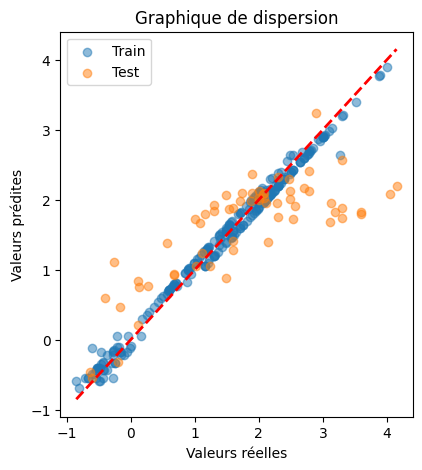

In [ ]:
y = np.hstack((y_train,y_test))
# Visualisation : Graphique de dispersion
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred_test, alpha=0.5, label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de dispersion')
plt.legend()